In [98]:
import os, pandas as pd, numpy as np

In [99]:
os.chdir("C:\\Users\\nihar\\OneDrive\\Desktop\\Bootcamp\\SCMA 632\\Assignments\\A1a\\Data")

In [100]:
df=pd.read_csv("NSSO68.csv",encoding="Latin-1", low_memory=False)

In [101]:
df.head()

,slno,grp,Round_Centre,FSU_number,Round,Schedule_Number,Sample,Sector,state,State_Region,...,pickle_v,sauce_jam_v,Othrprocessed_v,Beveragestotal_v,foodtotal_v,foodtotal_q,state_1,Region,fruits_df_tt_v,fv_tot
0,1,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1141.492400,30.942394,GUJ,2,12.000000,154.18
1,2,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,17.500000,1244.553500,29.286153,GUJ,2,333.000000,484.95
2,3,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,0.000000,1050.315400,31.527046,GUJ,2,35.000000,214.84
3,4,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,33.333333,1142.591667,27.834607,GUJ,2,168.333333,302.30
4,5,4.10E+31,1,41000,68,10,1,2,24,242,...,0.0,0.0,0.0,75.000000,945.249500,27.600713,GUJ,2,15.000000,148.00


In [102]:
MH = df[df['state_1']=="MH"]

In [103]:
MH.isnull().sum().sort_values(ascending = False)

soyabean_q         8043
soyabean_v         8043
Meals_School       7953
Meals_Employer     7899
Land_Leased_out    7880
                   ... 
palak_q               0
carrot_q              0
radish_q              0
brinjal_q             0
fv_tot                0
Length: 384, dtype: int64

In [104]:
df.columns

Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)

In [105]:
MH_new = MH[['state_1', 'District', 'Sector','Region', 'ricetotal_v', 'wheattotal_v', 'jowarp_v', 'barleyp_v', 'maizep_v', 'maida_v', 'suji_v', 'bajrap_v', 'milletp_v', 'wheattotal_v', 'jowarp_v', 'barleyp_v', 'maizep_v', 'maida_v', 'suji_v', 'bajrap_v', 'milletp_v']]

In [106]:
MH_new.isnull().sum().sort_values(ascending = False)

state_1         0
bajrap_v        0
bajrap_v        0
suji_v          0
maida_v         0
maizep_v        0
barleyp_v       0
jowarp_v        0
wheattotal_v    0
milletp_v       0
suji_v          0
District        0
maida_v         0
maizep_v        0
barleyp_v       0
jowarp_v        0
wheattotal_v    0
ricetotal_v     0
Region          0
Sector          0
milletp_v       0
dtype: int64

In [107]:
# Outlier Checking

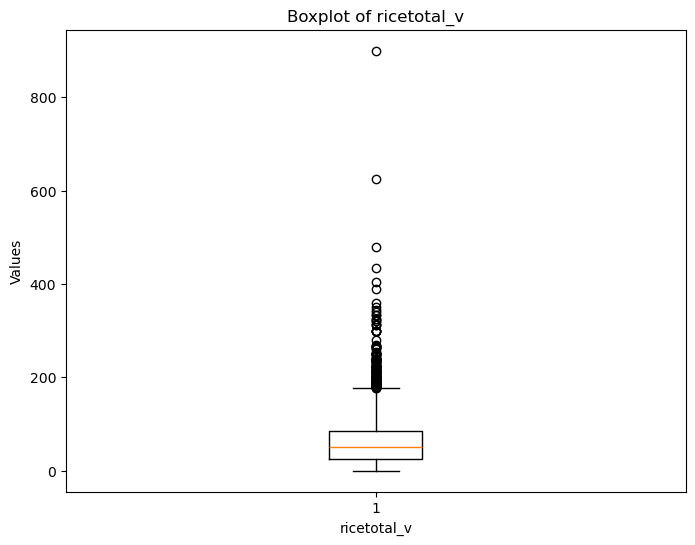

In [108]:
import matplotlib.pyplot as plt
# Assuming MH_clean is your DataFrame
plt.figure(figsize=(8, 6))
plt.boxplot(MH_new['ricetotal_v'])
plt.xlabel('ricetotal_v')
plt.ylabel('Values')
plt.title('Boxplot of ricetotal_v')
plt.show()

In [109]:
rice1 = MH_new['ricetotal_v'].quantile(0.25)
rice2 = MH_new ['ricetotal_v'].quantile(0.75)
iqr_rice = rice2-rice1
up_limit = rice2 + 1.5*iqr_rice
low_limit = rice1 - 1.5*iqr_rice

In [110]:
MH_new =MH_new[(MH_new['ricetotal_v']<=up_limit)&(MH_new['ricetotal_v']>=low_limit)]

{'whiskers': [<matplotlib.lines.Line2D at 0x165fa9ca410>,
 'caps': [<matplotlib.lines.Line2D at 0x1659021fe90>,
 'boxes': [<matplotlib.lines.Line2D at 0x16590107410>],
 'medians': [<matplotlib.lines.Line2D at 0x1659021c250>],
 'fliers': [<matplotlib.lines.Line2D at 0x1659021e0d0>],
 'means': []}

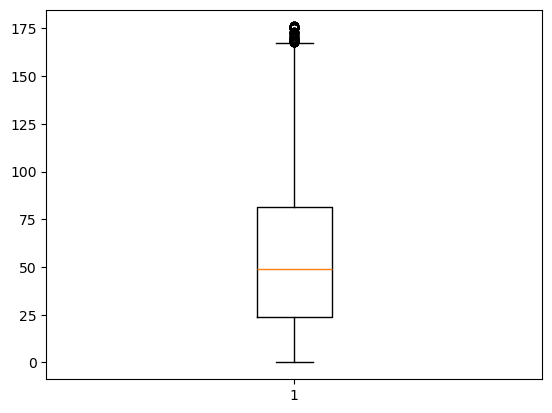

In [111]:
plt.boxplot(MH_new['ricetotal_v'])

In [112]:
MH_new['District'].unique()

array([21, 24, 22,  9, 13, 14, 12, 11,  7,  4,  5,  6,  8, 10, 28, 20, 27,
       18, 19, 17, 15,  2,  3,  1, 16, 25, 34, 35, 33, 31, 30, 29, 26, 32],
      dtype=int64)

In [113]:
# Replace values in the 'Sector' column
MH_new.loc[:,'Sector'] = MH_new['Sector'].replace([1, 2], ['URBAN', 'RURAL'])

In [114]:
#total consumption

In [115]:
MH_new.columns

Index(['state_1', 'District', 'Sector', 'Region', 'ricetotal_v',
       'wheattotal_v', 'jowarp_v', 'barleyp_v', 'maizep_v', 'maida_v',
       'suji_v', 'bajrap_v', 'milletp_v', 'wheattotal_v', 'jowarp_v',
       'barleyp_v', 'maizep_v', 'maida_v', 'suji_v', 'bajrap_v', 'milletp_v'],
      dtype='object')

In [116]:
MH_new.loc[MH_new.index, 'total_consumption'] = MH_new[['ricetotal_v', 'wheattotal_v', 'jowarp_v', 'barleyp_v', 'maizep_v', 'maida_v', 'suji_v', 'bajrap_v', 'milletp_v', 'wheattotal_v', 'jowarp_v', 'barleyp_v', 'maizep_v', 'maida_v', 'suji_v', 'bajrap_v', 'milletp_v']].sum(axis=1)

In [117]:
MH_new.head()

,state_1,District,Sector,Region,ricetotal_v,wheattotal_v,jowarp_v,barleyp_v,maizep_v,maida_v,...,milletp_v,wheattotal_v,jowarp_v,barleyp_v,maizep_v,maida_v,suji_v,bajrap_v,milletp_v,total_consumption
7577,MH,21,RURAL,1,91.0,100.0,0.0,0.0,0.0,0.0,...,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,491.0
7579,MH,21,RURAL,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7580,MH,21,RURAL,1,84.0,120.0,0.0,0.0,0.0,0.0,...,0.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,564.0
7581,MH,21,RURAL,1,75.0,100.0,0.0,0.0,0.0,0.0,...,0.0,100.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,507.0
7582,MH,21,RURAL,1,70.0,100.0,0.0,0.0,0.0,0.0,...,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,470.0


In [118]:
MH_new.groupby('Region').agg({'total_consumption':['std','mean','max','min']})

total_consumption                              
                     std        mean          max  min
Region                                                
1             213.205301  379.859149  1536.000000  0.0
2             237.839270  559.018854  3914.000000  0.0
3             164.926829  373.196319  1062.000000  0.0
4             227.981142  481.248561  1897.333333  0.0
5             176.564713  437.841208  1810.000000  0.0
6             141.509527  263.623876   718.666667  0.0

In [119]:
MH_new.groupby('District').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                     
                       std        mean          max         min
District                                                       
1               128.878427  339.352914   771.000000    0.000000
2               168.676345  361.767752  1062.000000    0.000000
3               180.368018  394.218173  1030.000000    0.000000
4               194.829357  432.566989  1618.750000   94.000000
5               195.035406  487.482292  1040.000000    0.000000
6               223.577856  427.903250  1810.000000   98.666667
7               159.565486  496.414703  1288.000000   70.000000
8               164.613606  369.612720  1085.000000    0.000000
9               156.410786  397.143424   865.333333    0.000000
10              145.450646  289.645695   604.000000    0.000000
11              132.721521  237.402968   684.000000    0.000000
12              134.306589  235.164001   615.000000    0.000000
13              144.449919  284.660926   718.666667    0.000000
14              148.269703  461.327282   855.000000   55.000000
15              231.507821  481.874432  1198.000000    0.000000
16              240.818388  464.477156  1685.666667    0.000000
17              200.951678  537.950080  1392.000000  100.833333
18              139.056245  389.471848   852.500000    0.000000
19              136.982517  379.977732   880.000000    0.000000
20              160.104166  373.474416   797.000000    0.000000
21              220.588450  364.382038  1536.000000    0.000000
22              213.234795  429.310403  1446.500000    0.000000
24              169.962282  248.111343   740.000000    0.000000
25              249.552792  509.617017  2247.000000    0.000000
26              201.065678  518.928595  1050.000000    0.000000
27              183.975002  441.276854  1490.000000    0.000000
28              294.460217  584.160451  1897.333333    0.000000
29              243.994401  633.051415  1400.000000   95.000000
30              212.449008  617.613736  1260.000000    0.000000
31              237.623347  548.412093  1096.000000    0.000000
32              161.173572  335.454468   798.000000    0.000000
33              162.639707  408.446672   810.000000    0.000000
34              189.431861  598.046630  1341.000000    0.000000
35              295.035633  619.014127  3914.000000    0.000000

In [120]:
total_consumption_by_districtcode=MH_new.groupby('District')['total_consumption'].sum()

In [121]:
total_consumption_by_districtcode.sort_values(ascending=False).head(3)

District
22    321553.491539
25    302202.890802
21    248508.550184
Name: total_consumption, dtype: float64

In [122]:
MH_new.loc[:,"District"] = MH_new.loc[:,"District"].replace({22: "Mumbai Suburban", 25: "Pune", 21: "Thane"})

In [123]:
total_consumption_by_districtname=MH_new.groupby('District')['total_consumption'].sum()

In [124]:
total_consumption_by_districtname.sort_values(ascending=False).head(3)

District
Mumbai Suburban    321553.491539
Pune               302202.890802
Thane              248508.550184
Name: total_consumption, dtype: float64

In [125]:
from statsmodels.stats import weightstats as stests

In [126]:
rural=MH_new[MH_new['Sector']=="RURAL"]
urban=MH_new[MH_new['Sector']=="URBAN"]

In [127]:
rural.head()

,state_1,District,Sector,Region,ricetotal_v,wheattotal_v,jowarp_v,barleyp_v,maizep_v,maida_v,...,milletp_v,wheattotal_v,jowarp_v,barleyp_v,maizep_v,maida_v,suji_v,bajrap_v,milletp_v,total_consumption
7577,MH,Thane,RURAL,1,91.0,100.0,0.0,0.0,0.0,0.0,...,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,491.0
7579,MH,Thane,RURAL,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7580,MH,Thane,RURAL,1,84.0,120.0,0.0,0.0,0.0,0.0,...,0.0,120.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,564.0
7581,MH,Thane,RURAL,1,75.0,100.0,0.0,0.0,0.0,0.0,...,0.0,100.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,507.0
7582,MH,Thane,RURAL,1,70.0,100.0,0.0,0.0,0.0,0.0,...,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,470.0


In [128]:
urban.head()

,state_1,District,Sector,Region,ricetotal_v,wheattotal_v,jowarp_v,barleyp_v,maizep_v,maida_v,...,milletp_v,wheattotal_v,jowarp_v,barleyp_v,maizep_v,maida_v,suji_v,bajrap_v,milletp_v,total_consumption
74284,MH,24,URBAN,1,122.0,100.000000,0.0,0.0,0.0,4.4,...,0.0,100.000000,0.0,0.0,0.0,4.4,4.8,0.0,0.0,558.800000
74285,MH,24,URBAN,1,125.0,58.333333,0.0,0.0,0.0,0.0,...,0.0,58.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,358.333333
74286,MH,24,URBAN,1,120.0,21.250000,0.0,0.0,0.0,0.0,...,0.0,21.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.000000
74287,MH,24,URBAN,1,20.0,3.333333,0.0,0.0,0.0,0.0,...,0.0,3.333333,0.0,0.0,0.0,0.0,2.0,0.0,0.0,41.333333
74288,MH,24,URBAN,1,144.0,28.000000,0.0,0.0,0.0,2.2,...,0.0,28.000000,0.0,0.0,0.0,2.2,0.0,0.0,0.0,264.800000


In [129]:
cons_rural=rural['total_consumption']
cons_urban=urban['total_consumption']

In [130]:
z_statistic, p_value = stests.ztest(cons_rural, cons_urban)
# Print the z-score and p-value
print("Z-Score:", z_statistic)
print("P-Value:", p_value)

Z-Score: 2.767739911233802
P-Value: 0.005644648277714505


In [131]:
#P value is < 0.05 i.e. 0, Therefore we reject the null hypothesis.There is a difference between mean consumptions of urban and rural.The mean consumption in Rural areas is 148.579142894145 and in Urban areas its 165.367499023822